In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

plt.style.use('classic')

%matplotlib inline

We know the general form of the LUT would be made of sin() and cos() functions.
Here we first take a cos() function, make fits to 3rd/4th/5th polynomials, and see how well the fits describe the function.

In [3]:
def testFunc(x):
    return np.cos(np.radians(x))
    #return np.sin(np.radians(x))

x0 = np.linspace(0,90,int(90/5)+1)
x = np.linspace(0,90, 91)
y0 = testFunc(x0)
y = testFunc(x)
x0e = np.hstack((-8.5, x0, 98.5)) #variables with "e" means we extend the range to a bit beyond [0, 90] deg.
y0e = testFunc(x0e)
xe = np.hstack((-8.5, -5, x, 95, 98.5))
ye = testFunc(xe)

p3c = np.polyfit(x0, y0, 3)
p4c = np.polyfit(x0, y0, 4)
p5c = np.polyfit(x0, y0, 5)

#p3c = np.polyfit(x0e, y0e, 3)
#p4c = np.polyfit(x0e, y0e, 4)
#p5c = np.polyfit(x0e, y0e, 5)

y3fit = np.poly1d(p3c)
y4fit = np.poly1d(p4c)
y5fit = np.poly1d(p5c)

y3diff = y-y3fit(x)
y4diff = y-y4fit(x)
y5diff = y-y5fit(x)

y3diffe = ye-y3fit(xe)
y4diffe = ye-y4fit(xe)
y5diffe = ye-y5fit(xe)

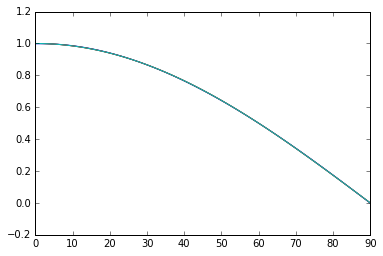

In [4]:
plt.plot(x, y3fit(x))
plt.plot(x, y4fit(x))
plt.plot(x, y5fit(x))
plt.plot(x, testFunc(x)); #the 3 fit curves are on top of each other

The deviation of p5 from the real function:

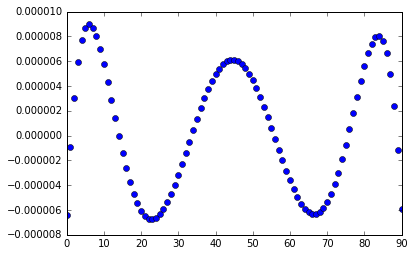

In [5]:
plt.plot(x, y5diff, 'o');

The fit is made in [0, 90], but we check the deviation in the extended range.

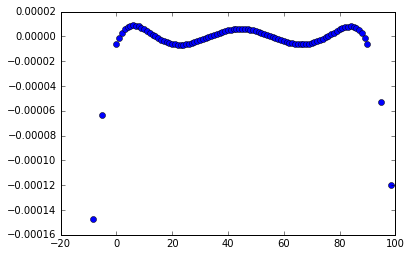

In [6]:
plt.plot(xe, y5diffe, 'o'); 
#beyond [0, 90], 0.00016*2500N = 0.4N, non-repeating force error=0.44N. FB will take care of it.

Look at how each term in the 5th order poly looks like.

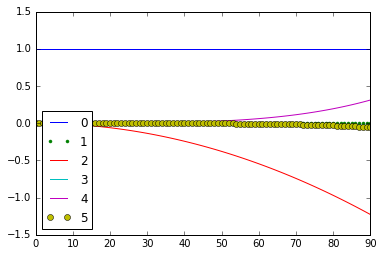

In [7]:
a = np.poly1d(np.hstack((0, 0,0,0,0, p5c[5])))
plt.plot(x, a(x),label='0')
b = np.poly1d(np.hstack((0, 0,0,0, p5c[4],0)))
plt.plot(x, b(x),'.',label='1')
c = np.poly1d(np.hstack((0, 0,0, p5c[3],0,0)))
plt.plot(x, c(x),label='2')
d = np.poly1d(np.hstack((0,0, p5c[2],0,0,0)))
plt.plot(x, d(x),label='3')
e = np.poly1d(np.hstack((0, p5c[1],0,0,0,0)))
plt.plot(x, e(x),label='4')
f = np.poly1d(np.hstack((p5c[0],0,0,0, 0, 0)))
plt.plot(x, f(x), 'o', label='5')
plt.legend(loc='lower left')

multiple the largest deviations (for p3/p4/p5) with the expected force ranges, and compare to the non-repeating error requirement

In [8]:
print('M1M3 forces: %.2f %.2f %.2f, non-repeating error = 0.44 Newtons'%(
    np.max(abs(y3diff*2500)), np.max(abs(y4diff*2500)), np.max(abs(y5diff*2500))))
print('M2 axial forces: %.2f %.2f %.2f, force measurement repeatability = 0.10 Newtons'%(
    np.max(abs(y3diff*250)), np.max(abs(y4diff*250)), np.max(abs(y5diff*250))))
#print('M2 tangent forces: %.2f %.2f %.2f, force measurement repeatability = 0.10 Newtons'%(
#    np.max(abs(y3diff*250)), np.max(abs(y4diff*250)), np.max(abs(y5diff*250)))) #tangent hardpoints are passive

M1M3 forces: 4.63 0.31 0.02, non-repeating error = 0.44 Newtons
M2 axial forces: 0.46 0.03 0.00, force measurement repeatability = 0.10 Newtons


### Do the same for the hexapods:

In [9]:
x0 = np.linspace(0,90,int(90/5)+1)
x = np.linspace(0,90, 91)
y0 = testFunc(x0)
y = testFunc(x)

p3c = np.polyfit(x0, y0, 3)
p4c = np.polyfit(x0, y0, 4)
p5c = np.polyfit(x0, y0, 5)

y3fit = np.poly1d(p3c)
y4fit = np.poly1d(p4c)
y5fit = np.poly1d(p5c)

In [10]:
# max displacements from <<Camera (and SM Hexapod) & Rotator Spec P6b.xlsx>>
m2hex_maxdisp = [0, 1.7, 1.845, 0.0114, 0, 0] #dx,dy,dz in mm, rx, ry, rz in deg
camhex_maxdisp =[0, 2.6, 1.845, 0.0660, 0, 0]

In [11]:
print('M2 hex dx/dy: %.1e %.1e %.1e, non-repeating error = 2e-2 mm'%(
    np.max(abs(y3diff*m2hex_maxdisp[1])), np.max(abs(y4diff*m2hex_maxdisp[1])), np.max(abs(y5diff*m2hex_maxdisp[1]))))
print('M2 hex dz: %.1e %.1e %.1e, non-repeating error = 4e-3 mm'%(
    np.max(abs(y3diff*m2hex_maxdisp[2])), np.max(abs(y4diff*m2hex_maxdisp[2])), np.max(abs(y5diff*m2hex_maxdisp[2]))))
print('M2 hex Rx: %.1e %.1e %.1e, non-repeating error = 1.328E-4 deg'%(
    np.max(abs(y3diff*m2hex_maxdisp[3])), np.max(abs(y4diff*m2hex_maxdisp[3])), np.max(abs(y5diff*m2hex_maxdisp[3]))))

M2 hex dx/dy: 3.1e-03 2.1e-04 1.5e-05, non-repeating error = 2e-2 mm
M2 hex dz: 3.4e-03 2.3e-04 1.7e-05, non-repeating error = 4e-3 mm
M2 hex Rx: 2.1e-05 1.4e-06 1.0e-07, non-repeating error = 1.328E-4 deg


In [12]:
print('Cam hex dx/dy: %.1e %.1e %.1e, non-repeating error = 2e-2 mm'%(
    np.max(abs(y3diff*camhex_maxdisp[1])), np.max(abs(y4diff*camhex_maxdisp[1])), np.max(abs(y5diff*camhex_maxdisp[1]))))
print('Cam hex dz: %.1e %.1e %.1e, non-repeating error = 4e-3 mm'%(
    np.max(abs(y3diff*camhex_maxdisp[2])), np.max(abs(y4diff*camhex_maxdisp[2])), np.max(abs(y5diff*camhex_maxdisp[2]))))
print('cam hex Rx: %.1e %.1e %.1e, non-repeating error = 3.276E-4 deg'%(
    np.max(abs(y3diff*camhex_maxdisp[3])), np.max(abs(y4diff*camhex_maxdisp[3])), np.max(abs(y5diff*camhex_maxdisp[3]))))

Cam hex dx/dy: 4.8e-03 3.2e-04 2.3e-05, non-repeating error = 2e-2 mm
Cam hex dz: 3.4e-03 2.3e-04 1.7e-05, non-repeating error = 4e-3 mm
cam hex Rx: 1.2e-04 8.2e-06 5.9e-07, non-repeating error = 3.276E-4 deg


### Now we look at the real (FEA) data

#### Read in data from <<Camera Hexapod Motions in Elevation Axis 2020 07 23.xlsx>> and <<M2 Hexapod Motions in Elevation Axis 2020 07 23.xlsx>>

In [13]:
filename = 'LUT/M2 Hexapod Motions in Elevation Axis 2020 07 23.xlsx'
sheetname = 'M2 Hex Motions in Elevation'
m2df = pd.read_excel(filename, sheet_name = sheetname, skiprows = 17,  nrows= 19, usecols = 'AC:AJ')

In [14]:
m2df

,deg .2,rads.3,dx.3,dy.3,dz.3,rx.3,ry.3,rz.3
0,90,1.570796,2.942346,556.661158,-656.970625,0.006705,-2.213304e-05,-9.264003e-05
1,85,1.483530,2.133244,556.057031,-567.003415,0.006638,-1.848748e-05,-7.461302e-05
2,80,1.396263,1.366087,546.525916,-478.282712,0.006471,-1.496505e-05,-5.746678e-05
3,75,1.308997,0.646713,528.140350,-391.483734,0.006206,-1.159255e-05,-4.133180e-05
4,70,1.221730,-0.019403,501.040260,-307.267074,0.005845,-8.395654e-06,-2.633088e-05
5,65,1.134464,-0.627190,465.431892,-226.273672,0.005390,-5.398687e-06,-1.257820e-05
6,60,1.047198,-1.172025,421.586249,-149.119936,0.004845,-2.624460e-06,-1.784024e-07
7,55,0.959931,-1.649759,369.837021,-76.393053,0.004214,-9.408517e-08,1.077413e-05
8,50,0.872665,-2.056758,310.578052,-8.646518,0.003502,2.173179e-06,2.019604e-05
9,45,0.785398,-2.389924,244.260339,53.604076,0.002713,4.160077e-06,2.801563e-05


In [15]:
x0 = 90 - np.array(m2df['deg .2']) #convert zenith angle to elevation angle
m2dx0 = np.array(m2df['dx.3'])
m2dy0 = np.array(m2df['dy.3'])
m2dz0 = np.array(m2df['dz.3'])
m2rx0 = np.array(m2df['rx.3'])
m2ry0 = np.array(m2df['ry.3'])
m2rz0 = np.array(m2df['rz.3'])
m2coeff = np.zeros((6,9))

To the first order, dx = 0, dy = a*sin(theta_z), dz = b*cos(theta_z), rx = c*sin(theta_z), ry = 0, rz=0

In [16]:
def abcFunc(x, a, b, c):
    return a*np.sin(np.radians(x)) + b*np.cos(np.radians(x))+c

We make fits to both the abc function and p5. We will save coefficients from both fits.

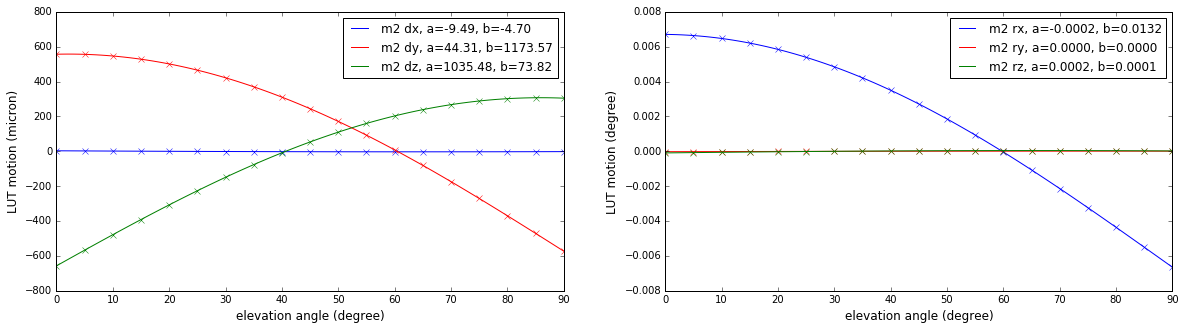

In [17]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
popt, pcov = curve_fit(abcFunc, x0, m2dx0)
ax[0].plot(x, abcFunc(x, *popt), 'b', label='m2 dx, a=%.2f, b=%.2f'%(popt[0], popt[1]))
ax[0].plot(x0, m2dx0, 'bx')
p5c = np.polyfit(x0, m2dx0, 5)
m2coeff[0,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, m2dy0)
ax[0].plot(x, abcFunc(x,*popt), 'r', label='m2 dy, a=%.2f, b=%.2f'%(popt[0], popt[1]))
ax[0].plot(x0, m2dy0, 'rx')
p5c = np.polyfit(x0, m2dy0, 5)
m2coeff[1,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, m2dz0)
ax[0].plot(x, abcFunc(x,*popt), 'g', label='m2 dz, a=%.2f, b=%.2f'%(popt[0], popt[1]))
ax[0].plot(x0, m2dz0, 'gx')
p5c = np.polyfit(x0, m2dz0, 5)
m2coeff[2,:] = np.hstack((popt, p5c))

ax[0].legend(loc='upper right')
ax[0].set_ylim([-800, 800])

ax[0].set_xlabel('elevation angle (degree)', fontsize=12)
ax[0].set_ylabel('LUT motion (micron)', fontsize=12)

popt, pcov = curve_fit(abcFunc, x0, m2rx0)
ax[1].plot(x, abcFunc(x, *popt), 'b', label='m2 rx, a=%.4f, b=%.4f'%(popt[0], popt[1]))
ax[1].plot(x0, m2rx0, 'bx')
p5c = np.polyfit(x0, m2rx0, 5)
m2coeff[3,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, m2ry0)
ax[1].plot(x, abcFunc(x,*popt), 'r', label='m2 ry, a=%.4f, b=%.4f'%(popt[0], popt[1]))
ax[1].plot(x0, m2ry0, 'rx')
p5c = np.polyfit(x0, m2ry0, 5)
m2coeff[4,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, m2rz0)
ax[1].plot(x, abcFunc(x,*popt), 'g', label='m2 rz, a=%.4f, b=%.4f'%(popt[0], popt[1]))
ax[1].plot(x0, m2rz0, 'gx')
p5c = np.polyfit(x0, m2rz0, 5)
m2coeff[5,:] = np.hstack((popt, p5c))

ax[1].legend(loc='upper right')
#ax[1].set_ylim([-800, 800])

ax[1].set_xlabel('elevation angle (degree)', fontsize=12)
ax[1].set_ylabel('LUT motion (degree)', fontsize=12);

columns are: 

m2LUT.txt: p0; p1; p2; p3; p4; p5

m2abc.txt: a; b; c; 

In [18]:
np.savetxt('m2LUT.txt', m2coeff[:,3:])
np.savetxt('m2abc.txt', m2coeff[:,:3])

#### camera hexapod

Text(0, 0.5, 'LUT motion (degree)')

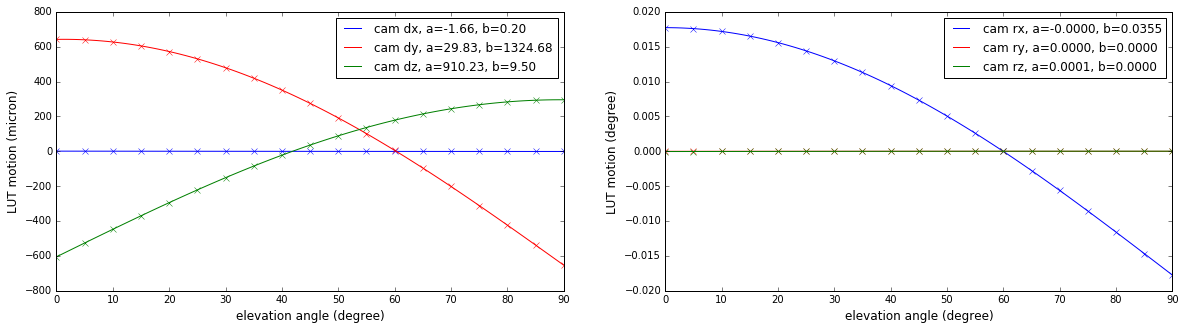

In [23]:
filename = 'LUT/Camera Hexapod Motions in Elevation Axis 2020 07 23.xlsx'
sheetname = 'Camera Hex Motions in Elevation'
camdf = pd.read_excel(filename, sheet_name = sheetname, skiprows = 17,  nrows= 19, usecols = 'AC:AJ')

x0 = 90 - np.array(camdf['deg .2'])
camdx0 = np.array(camdf['dx.3'])
camdy0 = np.array(camdf['dy.3'])
camdz0 = np.array(camdf['dz.3'])
camrx0 = np.array(camdf['rx.3'])
camry0 = np.array(camdf['ry.3'])
camrz0 = np.array(camdf['rz.3'])
camcoeff = np.zeros((6,9))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
popt, pcov = curve_fit(abcFunc, x0, camdx0)
ax[0].plot(x, abcFunc(x, *popt), 'b', label='cam dx, a=%.2f, b=%.2f'%(popt[0], popt[1]))
ax[0].plot(x0, camdx0, 'bx')
p5c = np.polyfit(x0, camdx0, 5)
camcoeff[0,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, camdy0)
ax[0].plot(x, abcFunc(x,*popt), 'r', label='cam dy, a=%.2f, b=%.2f'%(popt[0], popt[1]))
ax[0].plot(x0, camdy0, 'rx')
p5c = np.polyfit(x0, camdy0, 5)
camcoeff[1,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, camdz0)
ax[0].plot(x, abcFunc(x,*popt), 'g', label='cam dz, a=%.2f, b=%.2f'%(popt[0], popt[1]))
ax[0].plot(x0, camdz0, 'gx')
p5c = np.polyfit(x0, camdz0, 5)
camcoeff[2,:] = np.hstack((popt, p5c))

ax[0].legend(loc='upper right')
ax[0].set_ylim([-800, 800])

ax[0].set_xlabel('elevation angle (degree)', fontsize=12)
ax[0].set_ylabel('LUT motion (micron)', fontsize=12)

popt, pcov = curve_fit(abcFunc, x0, camrx0)
ax[1].plot(x, abcFunc(x, *popt), 'b', label='cam rx, a=%.4f, b=%.4f'%(popt[0], popt[1]))
ax[1].plot(x0, camrx0, 'bx')
p5c = np.polyfit(x0, camrx0, 5)
camcoeff[3,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, camry0)
ax[1].plot(x, abcFunc(x,*popt), 'r', label='cam ry, a=%.4f, b=%.4f'%(popt[0], popt[1]))
ax[1].plot(x0, camry0, 'rx')
p5c = np.polyfit(x0, camry0, 5)
camcoeff[4,:] = np.hstack((popt, p5c))

popt, pcov = curve_fit(abcFunc, x0, camrz0)
ax[1].plot(x, abcFunc(x,*popt), 'g', label='cam rz, a=%.4f, b=%.4f'%(popt[0], popt[1]))
ax[1].plot(x0, camrz0, 'gx')
p5c = np.polyfit(x0, camrz0, 5)
camcoeff[5,:] = np.hstack((popt, p5c))

ax[1].legend(loc='upper right')
#ax[1].set_ylim([-800, 800])

ax[1].set_xlabel('elevation angle (degree)', fontsize=12)
ax[1].set_ylabel('LUT motion (degree)', fontsize=12)

#ax[0].set_ylim([-10,10])

columns are: 

camLUT.txt: p0; p1; p2; p3; p4; p5

camabc.txt: a; b; c; 

In [ ]:
np.savetxt('camLUT.txt', camcoeff[:,3:])
np.savetxt('camabc.txt', camcoeff[:,:3])

In [20]:
camdf

,deg .2,rads.3,dx.3,dy.3,dz.3,rx.3,ry.3,rz.3
0,90,1.570796,0.927786,641.860517,-605.175634,0.017729,-2.275764e-06,-3.441770e-05
1,85,1.483530,0.782674,639.419713,-525.880258,0.017593,-1.451699e-06,-2.948852e-05
2,80,1.396263,0.637150,626.915855,-447.260678,0.017188,-6.995946e-07,-2.465315e-05
3,75,1.308997,0.492320,604.444105,-369.915237,0.016518,-2.517423e-08,-1.994838e-05
4,70,1.221730,0.349289,572.175486,-294.432581,0.015586,5.664294e-07,-1.541003e-05
5,65,1.134464,0.209143,530.355582,-221.387177,0.014401,1.070714e-06,-1.107263e-05
6,60,1.047198,0.072949,479.302667,-151.334946,0.012971,1.483841e-06,-6.969198e-06
7,55,0.959931,-0.058255,419.405286,-84.809028,0.011308,1.802667e-06,-3.130954e-06
8,50,0.872665,-0.183472,351.119292,-22.315724,0.009424,2.024765e-06,4.128845e-07
9,45,0.785398,-0.301748,274.964385,35.669353,0.007332,2.148445e-06,3.635348e-06
